## importing packages

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#importing Malayalam datasets
train=pd.read_csv('/content/drive/MyDrive/project/main/Trials/Dataset/Mal_sentiment_full_train.tsv',sep='\t')
dev=pd.read_csv('/content/drive/MyDrive/project/main/Trials/Dataset/Mal_sentiment_full_dev.tsv',sep='\t')
test=pd.read_csv('/content/drive/MyDrive/project/main/Trials/Dataset/Mal_sentiment_full_test_withoutlabels.tsv',sep='\t')

In [5]:
test.shape

(1962, 2)

# Fitting data

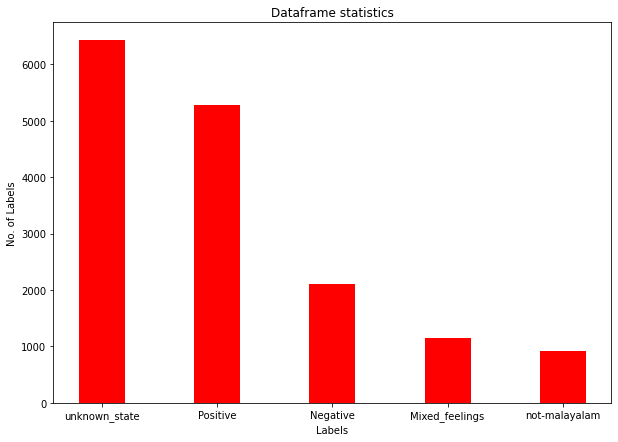

Positive          6421
unknown_state     5279
Negative          2105
not-malayalam     1157
Mixed_feelings     926
Name: category, dtype: int64

In [6]:
#Fitting Labels
train['category'] = train['category'].str.strip()

#Visualizing datas
Labels =  train['category'].unique()
count =   train['category'].value_counts()
  
fig = plt.figure(figsize = (10, 7))

# creating the bar plot
plt.bar(Labels, count, color ='red',  width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("No. of Labels")
plt.title("Dataframe statistics")
plt.show()

#Label counts
train['category'].value_counts()

In [7]:
#removing punctuations
import string
def remove_punctuations(txt):
    text_nopunc="".join([c for c in txt if c not in string.punctuation])
    return text_nopunc

train['text']=train['text'].apply(lambda x: remove_punctuations(x))



# Preprocessing data

In [8]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
train['category']=Encoder.fit_transform(train['category'])
dev['category']= Encoder.fit_transform(dev['category'])

In [9]:
train['category'].value_counts()

2    6421
4    5279
1    2105
3    1157
0     926
Name: category, dtype: int64

# Feature extraction  -  **tfidf**

In [10]:
#TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2000)
train_tfidf = tfidf.fit_transform(train['text']).toarray()
dev_tfidf = tfidf.transform(dev['text']).toarray()
test_tfidf = tfidf.transform(test['text']).toarray()

In [11]:
#spliting datas for training

X_train = train_tfidf
y_train = train['category']
X_dev = dev_tfidf
y_dev = dev['category']
X_test = test_tfidf

# model

## SVM

In [ ]:
#SVM
from sklearn.svm import SVC
SVM = SVC(C=1.0, kernel = 'linear', degree = 3, class_weight='balanced'   , gamma = 'auto')
SVM.fit(X_train, y_train)
y_pred_svm = SVM.predict(X_dev)

In [ ]:
#Evluating SVM Model
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_dev,y_pred_svm)) #used to see the accuracy of th
print(classification_report(y_dev, y_pred_svm))


In [ ]:
#predicting test dataset
y_pred_test_svm= SVM.predict(X_test)

## Naive Bayes

In [12]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(X_train, y_train)
NB_pred_tfidf_dev = NB_tfidf.predict(X_dev)

In [13]:
# Evaluating Naive Bayes Classifier
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_dev, NB_pred_tfidf_dev)) #used to see the accuracy of th
print(classification_report(y_dev,NB_pred_tfidf_dev))


[[ 14   5  57   0  26]
 [  3  76  89   1  68]
 [  1   8 589  12  96]
 [  0   0  39  84  18]
 [  4  12 174  12 378]]
              precision    recall  f1-score   support

           0       0.64      0.14      0.23       102
           1       0.75      0.32      0.45       237
           2       0.62      0.83      0.71       706
           3       0.77      0.60      0.67       141
           4       0.65      0.65      0.65       580

    accuracy                           0.65      1766
   macro avg       0.69      0.51      0.54      1766
weighted avg       0.66      0.65      0.62      1766



In [14]:
#predicting test data
NB_pred_tfidf_test = NB_tfidf.predict(X_test)

## Random Forest

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler(with_mean=False)
X_Train_RF = sc_X.fit_transform(X_train)
X_dev_RF = sc_X.transform(X_dev)
X_test_RF = sc_X.transform(X_test)

#Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train_RF,y_train)

# Predicting the dev set 
Y_Pred = classifier.predict(X_dev_RF)

In [16]:
# Evaluating Random Forest
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_dev,Y_Pred)) #used to see the accuracy of th
print(classification_report(y_dev,Y_Pred))

[[ 19   4  52   1  26]
 [  3  66  90   3  75]
 [  6  10 547  17 126]
 [  2   1  32  87  19]
 [  2  19 161  13 385]]
              precision    recall  f1-score   support

           0       0.59      0.19      0.28       102
           1       0.66      0.28      0.39       237
           2       0.62      0.77      0.69       706
           3       0.72      0.62      0.66       141
           4       0.61      0.66      0.64       580

    accuracy                           0.63      1766
   macro avg       0.64      0.50      0.53      1766
weighted avg       0.63      0.63      0.61      1766



In [17]:
#predicting test data
Y_Pred = classifier.predict(X_test_RF)